# Example of random sequence generation
This notebook is to experiment with random sequence generation

In [2]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)



#### Git machinery

In [3]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '8b1969b503c94272f7eccbd537d469922725b10e'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [21]:
from network import Protocol, BCPNNFast, NetworkManager
from connectivity_functions import  calculate_random_sequence, calculate_overlap_matrix
from connectivity_functions import calculate_overlap_one_to_all, calculate_overlap_one_to_one
from connectivity_functions import  artificial_connectivity_matrix
from plotting_functions import plot_artificial_sequences, plot_winning_pattern
from analysis_functions import calculate_timings, calculate_recall_success

## The example

In [23]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

sequence_length = 5
overload = 200
overlap = 4
one_to_one = True


# Desired patterns
total_sequences = 252

# Running parameters
max_iter = 1e4

# Random seed
prng = np.random.RandomState(seed=2)

In [24]:
aux = calculate_random_sequence(minicolumns, sequence_length, overlap,  overload,  one_to_one=one_to_one,
                                prng=prng, total_sequences=total_sequences, max_iter=max_iter)
sequences, overlap_dictionary, overload_matrix = aux

# Calculate characteirstics
if one_to_one:
    total_overlap = calculate_overlap_one_to_one(sequences)
else:
    total_overlap = calculate_overlap_one_to_all(overlap_dictionary)

overlap_matrix = calculate_overlap_matrix(sequences)

number of sequences
252
overload matrix
[ 126.  126.  126.  126.  126.  126.  126.  126.  126.  126.]
overlap matrix
[[ 0.  2.  3. ...,  2.  2.  2.]
 [ 2.  0.  1. ...,  2.  4.  2.]
 [ 3.  1.  0. ...,  2.  2.  2.]
 ..., 
 [ 2.  2.  2. ...,  0.  3.  3.]
 [ 2.  4.  2. ...,  3.  0.  2.]
 [ 2.  2.  2. ...,  3.  2.  0.]]
total overlap
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.

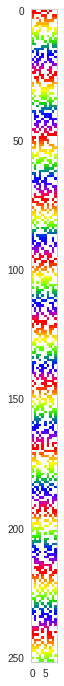

In [25]:
print('number of sequences')
print(len(sequences))
print('overload matrix')
print(overload_matrix)
print('overlap matrix')
print(overlap_matrix)
print('total overlap')
print(total_overlap)
plot_artificial_sequences(sequences, minicolumns)

## Example with recall

In [14]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

dt = 0.001

value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

sequence_length = 5
overload = 2
overlap = 4
one_to_one = True

# Desired patterns
total_sequences = 10

# Running parameters
max_iter = 1e4

# Random seed
prng = np.random.RandomState(seed=2)

In [15]:
aux = calculate_random_sequence(minicolumns, sequence_length, overlap,  overload,  one_to_one=one_to_one,
                                prng=prng, total_sequences=total_sequences, max_iter=max_iter)
sequences, overlap_dictionary, overload_matrix = aux
n_sequences = len(sequences)

w_nmda = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=False)

w_ampa = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=True)

nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
nn.w = w_nmda
nn.w_ampa = w_ampa
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
for pattern_indexes in sequences:
    manager.stored_patterns_indexes += pattern_indexes


sequence_to_Recall
[9, 13, 28, 36, 47]
sequence recalled
(9, 0.30199999999999999)
(13, 0.51000000000000001)
(28, 0.71899999999999997)
(36, 0.92900000000000005)
(47, 1.268)
(49, 1.4530000000000001)
(25, 1.6280000000000001)
(32, 1.677)
(25, 1.6890000000000001)
(32, 1.774)
(32, 1.827)
(25, 1.8360000000000001)
(25, 1.851)
(32, 1.8660000000000001)
(32, 1.8980000000000001)
(25, 1.9100000000000001)
(25, 1.9339999999999999)
(25, 1.948)
(25, 2.016)
(25, 2.073)
(32, 2.0979999999999999)


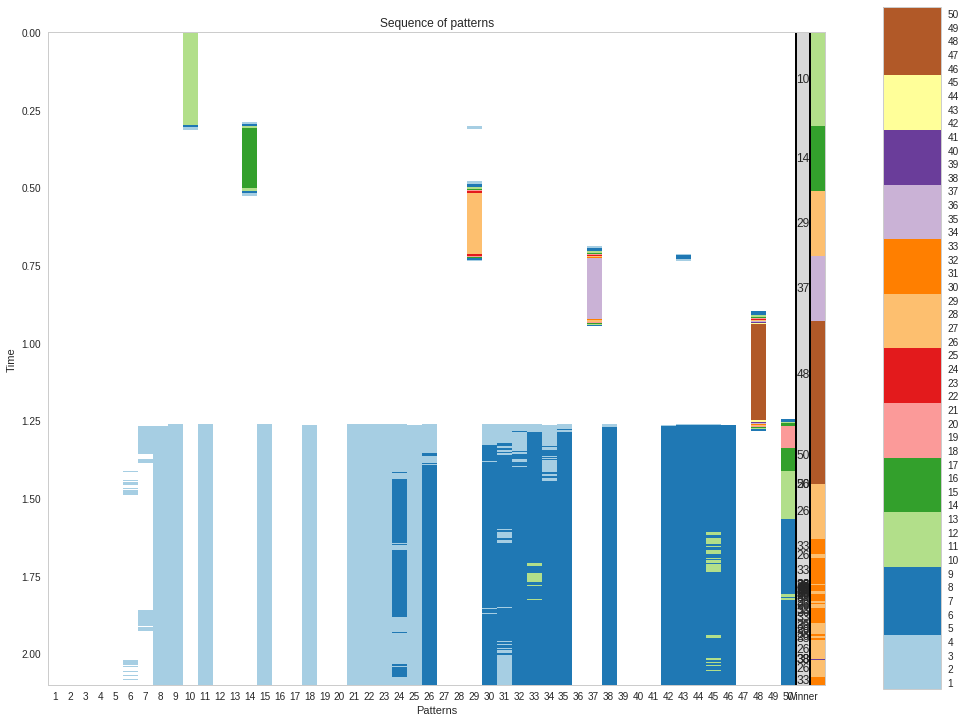

In [16]:
# Recall
T_cue = 0.100
n_recall = 0
sequence_to_recall = sequences[n_recall]
print('sequence_to_Recall')
print(sequence_to_recall)
I_cue = sequence_to_recall[0]
T_recall = 2.0
manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
plot_winning_pattern(manager)
timings = calculate_timings(manager, remove=0.010)
pair = [(x[0], x[3]) for x in timings]

print('sequence recalled')
for x in pair:
    print(x)

## More examples

In [18]:
# Patterns parameters
hypercolumns = 4
minicolumns = 15
n_patterns = 10

dt = 0.001

value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 0.9
extension = 2

sequence_length = 4
overload = 3
overlap = 3
one_to_one = True

# Desired patterns
total_sequences = 5

# Running parameters
max_iter = 1e4

# Random seed
prng = np.random.RandomState(seed=2)

In [19]:
aux = calculate_random_sequence(minicolumns, sequence_length, overlap,  overload,  one_to_one=one_to_one,
                                prng=prng, total_sequences=total_sequences, max_iter=max_iter)
sequences, overlap_dictionary, overload_matrix = aux
n_sequences = len(sequences)

w_nmda = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=False)

w_ampa = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=True)

nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
nn.w = w_nmda
nn.w_ampa = w_ampa
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
for pattern_indexes in sequences:
    manager.stored_patterns_indexes += pattern_indexes

In [22]:
# Recall
n = 10
T_cue = 0.100
successes = []
T_recall = 2.0
for n_recall in range(total_sequences):
    sequence_to_recall = sequences[n_recall]
    print('sequence to recall')
    print(sequence_to_recall)
    I_cue = sequence_to_recall[0]

    success = calculate_recall_success(manager, T_recall, I_cue, T_cue, n, patterns_indexes=sequence_to_recall)
    successes.append(success)

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
    timings = calculate_timings(manager, remove=0.010)
    pair = [(x[0], x[3]) for x in timings]

    for x in pair:
        print(x)

    print('success')
    print(success)
    print('----------------')

plt.show()

sequence to recall
[0, 4, 5, 11]
(0, 0.29999999999999999)
(4, 0.53800000000000003)
(5, 0.754)
(11, 0.96899999999999997)
(12, 1.3480000000000001)
(7, 1.45)
(13, 1.865)
(10, 1.9080000000000001)
(14, 2.0979999999999999)
success
100.0
----------------
sequence to recall
[0, 9, 10, 14]
(0, 0.29899999999999999)
(4, 0.53400000000000003)
(5, 0.747)
(11, 0.96599999999999997)
(12, 1.343)
(13, 1.3560000000000001)
(13, 1.865)
(1, 1.9160000000000001)
(6, 2.0249999999999999)
(7, 2.0979999999999999)
success
0.0
----------------
sequence to recall
[1, 5, 11, 12]
(1, 0.29799999999999999)
(5, 0.53100000000000003)
(11, 0.748)
(12, 1.1200000000000001)
(4, 1.22)
(14, 1.6850000000000001)
(0, 1.6990000000000001)
(13, 2.0979999999999999)
success
100.0
----------------
sequence to recall
[3, 4, 5, 11]
(3, 0.30099999999999999)
(4, 0.51000000000000001)
(5, 0.72899999999999998)
(11, 0.94200000000000006)
(12, 1.3169999999999999)
(10, 1.3800000000000001)
(14, 1.861)
(1, 1.9060000000000001)
(6, 1.964)
(7, 2.09799999